# Ôn tập giữa kỳ


In [4]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [2]:
data = pd.read_csv('datasets/brfss_2000.csv')
#Cho biết bảng dữ liệu có bao nhiêu dòng và bao nhiêu cột?
data.shape

(20000, 9)

In [6]:
data.head(10)

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good
5,1,1,0,64,114,114,55,f,very good
6,1,1,0,71,194,185,31,m,very good
7,0,1,0,67,170,160,45,m,very good
8,0,1,1,65,150,130,27,f,good
9,1,1,0,70,180,170,44,m,good


### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [9]:
# a. Tính tỷ lệ nam nữ
tong_so = len(data)
so_nam = len(data[data["gender"] == "m"])
so_nu = len(data[data["gender"] == "f"])

ty_le_nam = so_nam / tong_so * 100
ty_le_nu = so_nu / tong_so * 100

print(f"Tỷ lệ Nam: {ty_le_nam:.2f}%")
print(f"Tỷ lệ Nữ: {ty_le_nu:.2f}%")

# b. Tính tỷ lệ người tập thể thao tự đánh giá sức khỏe kém
tap_the_thao = data[data["exerany"] == 1]  # Lọc những người tập thể thao
suc_khoe_kem = len(tap_the_thao[tap_the_thao["genhlth"] == "poor"])  # Tìm người có sức khỏe kém
tong_tap_the_thao = len(tap_the_thao)

ty_le_suc_khoe_kem = (suc_khoe_kem / tong_tap_the_thao) * 100 if tong_tap_the_thao > 0 else 0

print(f"Tỷ lệ người tập thể thao có sức khỏe kém: {ty_le_suc_khoe_kem:.2f}%")

Tỷ lệ Nam: 47.84%
Tỷ lệ Nữ: 52.15%
Tỷ lệ người tập thể thao có sức khỏe kém: 1.96%


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [11]:
# a. Đổi đơn vị chiều cao và cân nặng
data["height_cm"] = data["height"] * 2.54  # Đổi chiều cao từ inches sang centimet
data["weight_kg"] = data["weight"] * 0.453592  # Đổi cân nặng từ pound sang kg

# Hiển thị dữ liệu sau khi đổi đơn vị
print("Dữ liệu sau khi đổi đơn vị:")
print(data[["height", "height_cm", "weight", "weight_kg"]].head())

# b. Tính tỷ lệ những người muốn giảm cân
muon_giam_can = data[data["weight"] > data["wtdesire"]]  # Lọc những người muốn giảm cân
tong_so = len(data)  # Tổng số người
so_nguoi_muon_giam_can = len(muon_giam_can)

ty_le_giam_can = (so_nguoi_muon_giam_can / tong_so) * 100 if tong_so > 0 else 0

print(f"Tỷ lệ những người muốn giảm cân: {ty_le_giam_can:.2f}%")

Dữ liệu sau khi đổi đơn vị:
   height  height_cm  weight  weight_kg
0      70     177.80     175  79.378600
1      64     162.56     125  56.699000
2      60     152.40     105  47.627160
3      66     167.64     132  59.874144
4      61     154.94     150  68.038800
Tỷ lệ những người muốn giảm cân: 63.82%


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

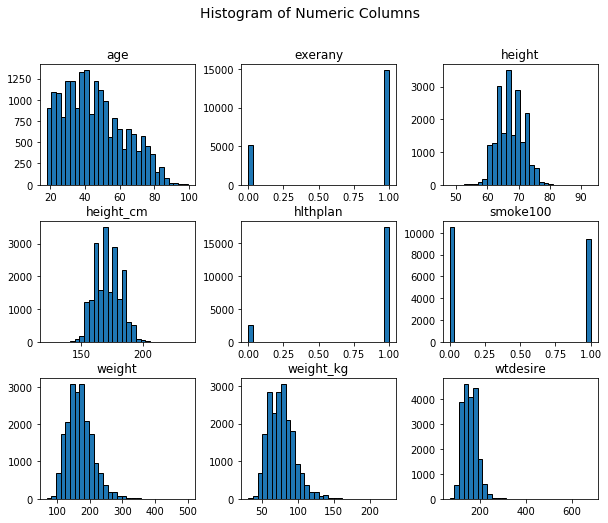

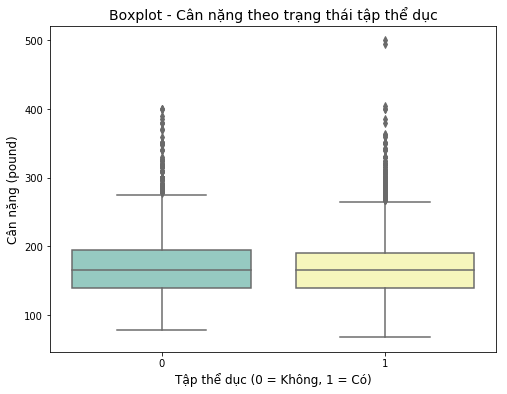

In [24]:
#a
# Lấy danh sách các cột số
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Vẽ histogram của tất cả các biến số
data[numeric_cols].hist(figsize=(10, 8), bins=30, edgecolor='black', grid=False)
plt.suptitle("Histogram of Numeric Columns", fontsize=14)
plt.show()

#b)# Vẽ boxplot so sánh cân nặng của những người có tập thể dục (exerany)
plt.figure(figsize=(8, 6))
sns.boxplot(x='exerany', y='weight', data=data, palette="Set3")
plt.title("Boxplot - Cân nặng theo trạng thái tập thể dục", fontsize=14)
plt.xlabel("Tập thể dục (0 = Không, 1 = Có)", fontsize=12)
plt.ylabel("Cân nặng (pound)", fontsize=12)
plt.show()


### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



In [25]:
# Tính các thống kê mô tả cho tuổi (age)
age_stats = data['age'].describe()

# Lấy tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75%
age_mean = data['age'].mean()
age_std = data['age'].std()
age_25 = data['age'].quantile(0.25)
age_50 = data['age'].quantile(0.50)
age_75 = data['age'].quantile(0.75)

age_stats, age_mean, age_std, age_25, age_50, age_75


(count    20000.000000
 mean        45.068250
 std         17.192689
 min         18.000000
 25%         31.000000
 50%         43.000000
 75%         57.000000
 max         99.000000
 Name: age, dtype: float64, 45.06825, 17.19268947448475, 31.0, 43.0, 57.0)

### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



In [26]:
# Tính tỷ lệ phần trăm người hút thuốc lá (smoke100 = 1)
smoking_rate = (data['smoke100'].mean()) * 100

# Phân nhóm theo tuổi và tính tỷ lệ người hút thuốc trong từng nhóm
# Chia nhóm tuổi theo các khoảng: <30, 30-50, >50
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 50, 100], labels=['<30', '30-50', '>50'])
smoking_by_age_group = data.groupby('age_group')['smoke100'].mean() * 100

smoking_rate, smoking_by_age_group


(47.205000000000005, age_group
 <30      38.846641
 30-50    46.469741
 >50      53.790718
 Name: smoke100, dtype: float64)

### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [29]:
# Tính BMI cho mỗi người: BMI = weight (pound) / (height (inch))^2 * 703
data['BMI'] = data['weight'] / (data['height'] ** 2) * 703

# Tính BMI trung bình theo giới tính
bmi_by_gender = data.groupby('gender')['BMI'].mean()

bmi_by_gender


gender
f    25.741147
m    26.923670
Name: BMI, dtype: float64

### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [30]:
# Phân loại béo phì theo tiêu chuẩn CDC
# Underweight: < 18.5, Normal weight: 18.5 - 24.9, Overweight: 25 - 29.9, Obese: >= 30
data['obesity'] = data['BMI'] >= 30

# Tính tỷ lệ béo phì theo giới tính
obesity_by_gender = data.groupby('gender')['obesity'].mean() * 100

# Tính tỷ lệ béo phì theo nhóm tuổi
obesity_by_age_group = data.groupby('age_group')['obesity'].mean() * 100

obesity_by_gender, obesity_by_age_group


(gender
 f    18.512127
 m    20.117045
 Name: obesity, dtype: float64, age_group
 <30      13.751584
 30-50    21.253602
 >50      20.683194
 Name: obesity, dtype: float64)


4. (2 điểm) Tạo thêm một cột có tên BMI biết rằng:

BMI = mas8kg chiều cao heightin × 703

a. Vẽ đồ thị histogram của BMI (với bins-50). Từ phân phối của BMI bạn hãy đưa ra nhận xét về các đối tượng khảo sát trong dữ liệu.

b. Vẽ đồ thị boxplot về BMI theo thuộc tỉnh tự đánh giá sức khỏe (genhlth). Dựa vào đồ thị đưa ra nhận xét.

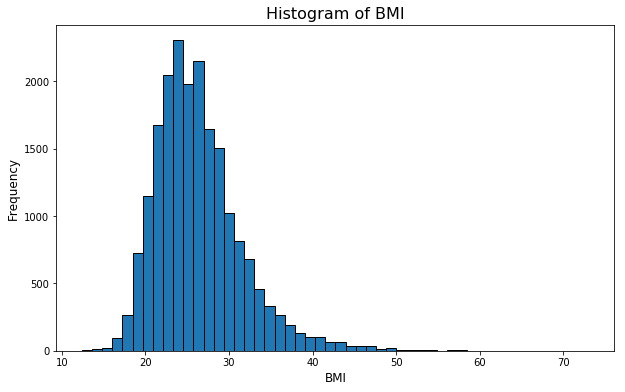

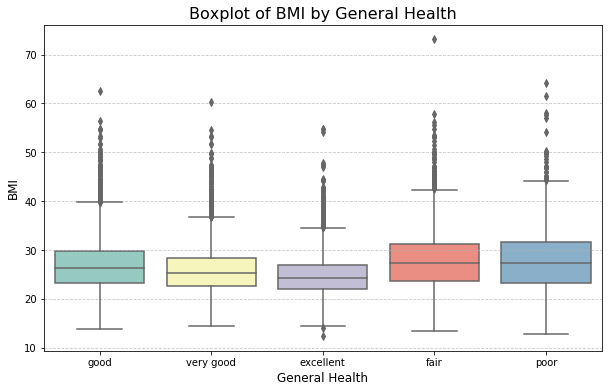

In [9]:
# Calculate BMI
data['BMI'] = (data['weight'] / (data['height'] ** 2)) * 703

# a) Plot histogram of BMI
plt.figure(figsize=(10, 6))
data['BMI'].hist(bins=50, edgecolor='black')
plt.title('Histogram of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)
plt.show()

# b) Boxplot of BMI by general health
plt.figure(figsize=(10, 6))
sns.boxplot(x='genhlth', y='BMI', data=data, palette='Set3')
plt.title('Boxplot of BMI by General Health', fontsize=16)
plt.xlabel('General Health', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()